In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## PHQ10

In [ ]:
import pandas as pd
dpq = pd.read_sas("/content/drive/MyDrive/DSCI531/Project/NHANES/P_DPQ.xpt", format="xport")

In [ ]:
import numpy as np
dpq.replace(dpq.at[0, 'DPQ010'], 0, inplace=True)

dpq = dpq[(dpq.drop(columns=['SEQN']) <= 3).all(axis=1)]

dpq.DPQ010.value_counts()


phq_items = ['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070','DPQ080','DPQ090']

dpq['PHQ9_Score'] = dpq[phq_items].sum(axis=1)

<ipython-input-3-97119948acd6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpq['PHQ9_Score'] = dpq[phq_items].sum(axis=1)


In [ ]:
dpq['DPQ010'].value_counts()

DPQ010
0.0    3396
1.0    1368
2.0     447
3.0     306
Name: count, dtype: int64

In [ ]:
dpq['PHQ9_Score'].value_counts()

PHQ9_Score
1.0     1099
2.0      955
3.0      734
4.0      565
5.0      409
6.0      324
7.0      252
8.0      232
9.0      181
10.0     154
11.0     122
12.0      93
14.0      69
13.0      63
15.0      50
16.0      43
18.0      41
17.0      37
20.0      19
19.0      19
21.0      17
22.0      15
23.0      12
24.0       5
26.0       3
25.0       3
27.0       1
Name: count, dtype: int64

In [ ]:
dpq['Depression_Label'] = dpq['PHQ9_Score'].apply(lambda x: 0 if x <= 10 else (1 if (x>10 and x <= 20) else 2))

<ipython-input-4-534234118bb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpq['Depression_Label'] = dpq['PHQ9_Score'].apply(lambda x: 0 if x <= 10 else (1 if (x>10 and x <= 20) else 2))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


X = dpq[phq_items].copy()
y = dpq['Depression_Label']


X = X.dropna()
y = y[X.index]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       989
           1       0.99      0.99      0.99       103
           2       0.92      0.92      0.92        12

    accuracy                           1.00      1104
   macro avg       0.97      0.97      0.97      1104
weighted avg       1.00      1.00      1.00      1104

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       989
           1       0.95      0.78      0.86       103
           2       0.91      0.83      0.87        12

    accuracy                           0.98      1104
   macro avg       0.95      0.87      0.90      1104
weighted avg       0.98      0.98      0.97      1104



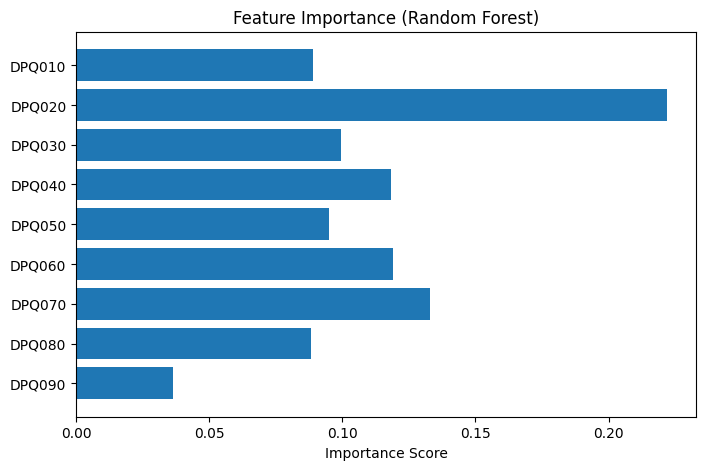

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
feature_names = phq_items

# Plot
plt.figure(figsize=(8,5))
plt.barh(feature_names, importances)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

## Demographic Data

In [ ]:
# Load Demographics Dataset
demo = pd.read_sas("/content/drive/MyDrive/DSCI531/Project/NHANES/P_DEMO.xpt", format="xport")

# Preview columns
demo = demo[['SEQN', 'RIDAGEYR', 'RIAGENDR',	'RIDRETH3','DMDMARTZ', 'INDFMPIR', 'DMDEDUC2']]

demo


SEQN  RIDAGEYR  RIAGENDR  RIDRETH3  DMDMARTZ  INDFMPIR  DMDEDUC2
0      109263.0       2.0       1.0       6.0       NaN      4.66       NaN
1      109264.0      13.0       2.0       1.0       NaN      0.83       NaN
2      109265.0       2.0       1.0       3.0       NaN      3.06       NaN
3      109266.0      29.0       2.0       6.0       3.0      5.00       5.0
4      109267.0      21.0       2.0       2.0       3.0      5.00       4.0
...         ...       ...       ...       ...       ...       ...       ...
15555  124818.0      40.0       1.0       4.0       1.0      3.82       5.0
15556  124819.0       2.0       1.0       4.0       NaN      0.07       NaN
15557  124820.0       7.0       2.0       3.0       NaN      1.22       NaN
15558  124821.0      63.0       1.0       4.0       2.0      3.71       2.0
15559  124822.0      74.0       1.0       2.0       1.0       NaN       3.0

[15560 rows x 7 columns]

#### IncomeRatio
INDFMPIR - Ratio of family income to poverty

A ratio of family income to poverty guidelines.

Code or Value	Value Description	Count

0 to 4.98	Range of Values	11213

5	Value greater than or equal to 5.00	2146

.	Missing	2201


A ratio of 1.0 means the family's income is exactly at the poverty level.

A ratio below 1.0 indicates the family is living below the poverty line.

A ratio above 1.0 suggests the family's income is above the poverty level. For instance, a ratio of 1.89 means the family's income is 189% of the poverty threshold.

In [ ]:
demo = demo[(demo.DMDMARTZ != 99) & (demo.DMDMARTZ != 77)]

#### Marital Status

1	Married/Living with Partner

2	Widowed/Divorced/Separated

3	Never married

#### EducationLevel

What is the highest grade or level of school {you have/SP has} completed or the highest degree {you have/s/he has} received?

Code or Value	Value Description	Count	Cumulative	Skip to Item

1	Less than 9th grade	719	719

2	9-11th grade (Includes 12th grade with no diploma)	1041	1760

3	High school graduate/GED or equivalent	2225	3985

4	Some college or AA degree	2975	6960

5	College graduate or above	2257	9217

7	Refused	2	9219

9	Don't Know	13	9232

.	Missing	6328	15560

In [ ]:
demo = demo[(demo.DMDEDUC2 != 9) & (demo.DMDEDUC2 != 7)]
demo

SEQN  RIDAGEYR  RIAGENDR  RIDRETH3  DMDMARTZ  INDFMPIR  DMDEDUC2
0      109263.0       2.0       1.0       6.0       NaN      4.66       NaN
1      109264.0      13.0       2.0       1.0       NaN      0.83       NaN
2      109265.0       2.0       1.0       3.0       NaN      3.06       NaN
3      109266.0      29.0       2.0       6.0       3.0      5.00       5.0
4      109267.0      21.0       2.0       2.0       3.0      5.00       4.0
...         ...       ...       ...       ...       ...       ...       ...
15555  124818.0      40.0       1.0       4.0       1.0      3.82       5.0
15556  124819.0       2.0       1.0       4.0       NaN      0.07       NaN
15557  124820.0       7.0       2.0       3.0       NaN      1.22       NaN
15558  124821.0      63.0       1.0       4.0       2.0      3.71       2.0
15559  124822.0      74.0       1.0       2.0       1.0       NaN       3.0

[15538 rows x 7 columns]

#### Race

1 Mexican American,

2 Other Hispanic,

3	Non-Hispanic White,

4	Non-Hispanic Black,

6	Non-Hispanic Asian,

7	Other Race - Including Multi-Racial

In [ ]:
# Merge PHQ data with Demographics using SEQN and Income Ratio
# merged_df = pd.merge(dpq, demo, on='SEQN', how='inner')

# Rename columns
demo.rename(columns={
    'RIDAGEYR': 'Age',
    'RIAGENDR': 'Gender',        # 1 = Male, 2 = Female
    'INDFMPIR': 'IncomeRatio',    # Poverty Income Ratio
    'RIDRETH3': 'Race',
    # 'DMDBORN4': 'CountryBirth',
    'DMDEDUC2': 'EducationLevel',
    'DMDMARTZ': 'MaritalStatus'
}, inplace=True)



In [ ]:
demo

SEQN   Age  Gender  Race  MaritalStatus  IncomeRatio  \
0      109263.0   2.0     1.0   6.0            NaN         4.66   
1      109264.0  13.0     2.0   1.0            NaN         0.83   
2      109265.0   2.0     1.0   3.0            NaN         3.06   
3      109266.0  29.0     2.0   6.0            3.0         5.00   
4      109267.0  21.0     2.0   2.0            3.0         5.00   
...         ...   ...     ...   ...            ...          ...   
15555  124818.0  40.0     1.0   4.0            1.0         3.82   
15556  124819.0   2.0     1.0   4.0            NaN         0.07   
15557  124820.0   7.0     2.0   3.0            NaN         1.22   
15558  124821.0  63.0     1.0   4.0            2.0         3.71   
15559  124822.0  74.0     1.0   2.0            1.0          NaN   

       EducationLevel  
0                 NaN  
1                 NaN  
2                 NaN  
3                 5.0  
4                 4.0  
...               ...  
15555             5.0  
15556             NaN  
15557             NaN  
15558             2.0  
15559             3.0  

[15538 rows x 7 columns]

In [ ]:
demo.Gender.value_counts()

Gender
2.0    7827
1.0    7711
Name: count, dtype: int64

### Occupation Information

In [ ]:
# Load Demographics Dataset
occ = pd.read_sas("/content/drive/MyDrive/DSCI531/Project/NHANES/P_OCQ.xpt", format="xport")

occ = occ[['SEQN', 'OCQ180', 'OCQ670']]

occ = occ[(occ.OCQ180 != 77777) & (occ.OCQ180 != 99999) & (occ.OCQ670 != 7) & (occ.OCQ670 != 9)]

occ.rename(columns={
    'OCQ180': 'HoursWorked',
    'OCQ670': 'WorkSchedule'
}, inplace=True)

# occ = occ.dropna()

occ

SEQN  HoursWorked  WorkSchedule
0      109266.0         40.0           1.0
1      109267.0         40.0           1.0
2      109268.0          NaN           NaN
3      109271.0          NaN           NaN
4      109273.0         28.0           2.0
...         ...          ...           ...
10190  124815.0         16.0           3.0
10191  124817.0          NaN           NaN
10192  124818.0         48.0           1.0
10193  124821.0         46.0           3.0
10194  124822.0         45.0           1.0

[10181 rows x 3 columns]

In [ ]:
len(set(demo.SEQN.unique()).intersection(set(occ.SEQN.unique())))

10159

### Final Merged Demographics

In [ ]:
demo = pd.merge(demo, occ, on='SEQN', how='outer')
demo

SEQN   Age  Gender  Race  MaritalStatus  IncomeRatio  \
0      109263.0   2.0     1.0   6.0            NaN         4.66   
1      109264.0  13.0     2.0   1.0            NaN         0.83   
2      109265.0   2.0     1.0   3.0            NaN         3.06   
3      109266.0  29.0     2.0   6.0            3.0         5.00   
4      109267.0  21.0     2.0   2.0            3.0         5.00   
...         ...   ...     ...   ...            ...          ...   
15555  124818.0  40.0     1.0   4.0            1.0         3.82   
15556  124819.0   2.0     1.0   4.0            NaN         0.07   
15557  124820.0   7.0     2.0   3.0            NaN         1.22   
15558  124821.0  63.0     1.0   4.0            2.0         3.71   
15559  124822.0  74.0     1.0   2.0            1.0          NaN   

       EducationLevel  HoursWorked  WorkSchedule  
0                 NaN          NaN           NaN  
1                 NaN          NaN           NaN  
2                 NaN          NaN           NaN  
3                 5.0         40.0           1.0  
4                 4.0         40.0           1.0  
...               ...          ...           ...  
15555             5.0         48.0           1.0  
15556             NaN          NaN           NaN  
15557             NaN          NaN           NaN  
15558             2.0         46.0           3.0  
15559             3.0         45.0           1.0  

[15560 rows x 9 columns]

In [ ]:
demo = pd.merge(demo, dpq[['SEQN', 'Depression_Label']], on='SEQN', how='outer')
demo

SEQN   Age  Gender  Race  MaritalStatus  IncomeRatio  \
0      109263.0   2.0     1.0   6.0            NaN         4.66   
1      109264.0  13.0     2.0   1.0            NaN         0.83   
2      109265.0   2.0     1.0   3.0            NaN         3.06   
3      109266.0  29.0     2.0   6.0            3.0         5.00   
4      109267.0  21.0     2.0   2.0            3.0         5.00   
...         ...   ...     ...   ...            ...          ...   
15555  124818.0  40.0     1.0   4.0            1.0         3.82   
15556  124819.0   2.0     1.0   4.0            NaN         0.07   
15557  124820.0   7.0     2.0   3.0            NaN         1.22   
15558  124821.0  63.0     1.0   4.0            2.0         3.71   
15559  124822.0  74.0     1.0   2.0            1.0          NaN   

       EducationLevel  HoursWorked  WorkSchedule  Depression_Label  
0                 NaN          NaN           NaN               NaN  
1                 NaN          NaN           NaN               NaN  
2                 NaN          NaN           NaN               NaN  
3                 5.0         40.0           1.0               NaN  
4                 4.0         40.0           1.0               NaN  
...               ...          ...           ...               ...  
15555             5.0         48.0           1.0               0.0  
15556             NaN          NaN           NaN               NaN  
15557             NaN          NaN           NaN               NaN  
15558             2.0         46.0           3.0               0.0  
15559             3.0         45.0           1.0               0.0  

[15560 rows x 10 columns]

In [ ]:
# demo = demo.dropna()
# demo

In [ ]:
demo.Gender.value_counts()
# 2 --> Female
# 1 --> Male

Gender
2.0    7827
1.0    7711
Name: count, dtype: int64

In [ ]:
occ.WorkSchedule.value_counts()

WorkSchedule
1.0    2046
5.0    1982
3.0     838
2.0     708
Name: count, dtype: int64

In [ ]:
demo.Race.value_counts()

Race
3.0    5268
4.0    4090
1.0    1988
6.0    1637
2.0    1539
7.0    1016
Name: count, dtype: int64

In [ ]:
demo.MaritalStatus.value_counts()

MaritalStatus
1.0    5276
2.0    2144
3.0    1790
Name: count, dtype: int64

In [ ]:
demo

SEQN   Age  Gender  Race  MaritalStatus  IncomeRatio  \
0      109263.0   2.0     1.0   6.0            NaN         4.66   
1      109264.0  13.0     2.0   1.0            NaN         0.83   
2      109265.0   2.0     1.0   3.0            NaN         3.06   
3      109266.0  29.0     2.0   6.0            3.0         5.00   
4      109267.0  21.0     2.0   2.0            3.0         5.00   
...         ...   ...     ...   ...            ...          ...   
15555  124818.0  40.0     1.0   4.0            1.0         3.82   
15556  124819.0   2.0     1.0   4.0            NaN         0.07   
15557  124820.0   7.0     2.0   3.0            NaN         1.22   
15558  124821.0  63.0     1.0   4.0            2.0         3.71   
15559  124822.0  74.0     1.0   2.0            1.0          NaN   

       EducationLevel  HoursWorked  WorkSchedule  Depression_Label  
0                 NaN          NaN           NaN               NaN  
1                 NaN          NaN           NaN               NaN  
2                 NaN          NaN           NaN               NaN  
3                 5.0         40.0           1.0               NaN  
4                 4.0         40.0           1.0               NaN  
...               ...          ...           ...               ...  
15555             5.0         48.0           1.0               0.0  
15556             NaN          NaN           NaN               NaN  
15557             NaN          NaN           NaN               NaN  
15558             2.0         46.0           3.0               0.0  
15559             3.0         45.0           1.0               0.0  

[15560 rows x 10 columns]

In [ ]:
demo.columns

Index(['SEQN', 'Age', 'Gender', 'Race', 'MaritalStatus', 'IncomeRatio',
       'EducationLevel', 'HoursWorked', 'WorkSchedule', 'Depression_Label'],
      dtype='object')

<ipython-input-56-64c817694d20>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-56-64c817694d20>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-56-64c817694d20>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-56-64c817694d20>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


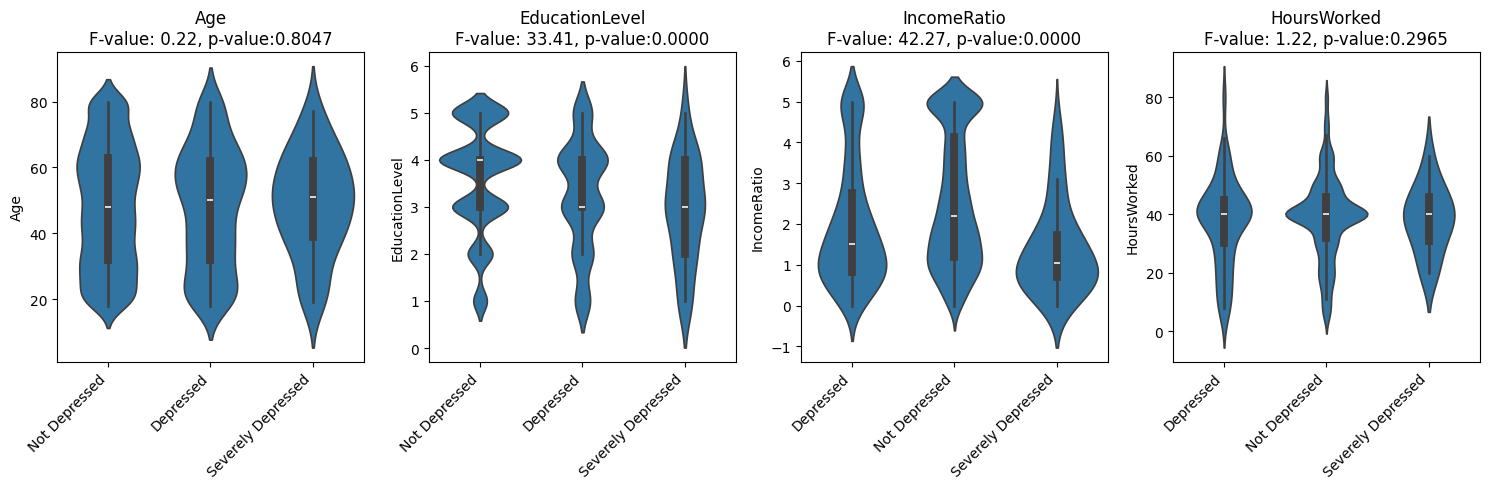

In [ ]:
feats = ['Age', 'EducationLevel', 'IncomeRatio', 'HoursWorked']

import scipy
from scipy import stats


def anova_grid(df, feats, label, n_cols = 4):

  n_feats = len(feats)
  n_rows = (n_feats + n_cols - 1)//n_cols

  fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 5*n_rows))

  axes = axes.flatten()

  label_mapping = {0: 'Not Depressed', 1: 'Depressed', 2: 'Severely Depressed'}
  df_filtered = df.copy()
  df_filtered[label] = df_filtered[label].map(label_mapping)

  for i, feature in enumerate(feats):

    # if feature == 'HoursWorked':
    df_filtered2 = df_filtered[[feature, label]].copy()
    df_filtered2 = df_filtered2.dropna()

    ax = axes[i]

    grps = [grp for _, grp in df_filtered2.groupby(label)[feature]]

    f_value, p_value = stats.f_oneway(*grps)

    sns.violinplot(x = label, y = feature, data = df_filtered2, ax = ax, inner = 'box')

    ax.set_title(f'{feature}\nF-value: {f_value:.2f}, p-value:{p_value:.4f}')
    ax.set_xlabel("")
    ax.set_ylabel(feature)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  plt.tight_layout()
  plt.show()



anova_grid(demo, feats, 'Depression_Label')


In [ ]:
demo.columns

Index(['SEQN', 'Age', 'Gender', 'Race', 'MaritalStatus', 'IncomeRatio',
       'EducationLevel', 'HoursWorked', 'WorkSchedule', 'Depression_Label'],
      dtype='object')

In [ ]:
categorical_feats = ['Gender', 'Race', 'MaritalStatus', 'WorkSchedule']
labels_dict = {'Gender':{ 1 : 'Male', 2 : 'Female'},

  'Race' : { 1 : 'Mexican American', 2 : 'Other Hispanic', 3:'Non-Hispanic White', 4:'Non-Hispanic Black', 6:'Non-Hispanic Asian',	7:'Other Race - Including Multi-Racial'},
  'MaritalStatus' : {1 : 'Married', 2 : 'Divorced/Separated' , 3 : 'Never married' },
               'WorkSchedule' : {1 : '9AM-5PM', 2 : 'Evening/Nights', 3 : 'Early Morning', 5 : 'Variable (early mornings, day, night)'}}



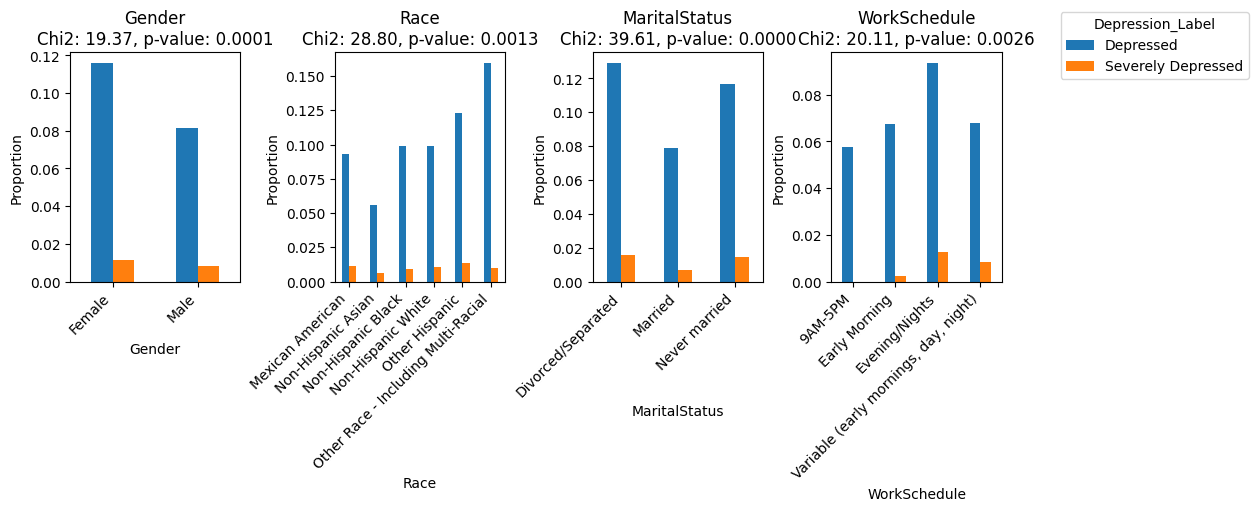

In [ ]:
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def chi_(df, feats, label, n_cols=4, labels_dict={}):
    """
    Creates a grid of bar plots for categorical features and performs chi-square tests.

    Parameters:
    df (DataFrame): The dataset.
    feats (list): List of categorical feature column names.
    label (str): The target categorical variable.
    n_cols (int): Number of columns in the subplot grid.
    """
    n_feats = len(feats)
    n_rows = (n_feats + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows), constrained_layout=True)
    axes = axes.flatten()

    label_mapping = {0: 'Not Depressed', 1: 'Depressed', 2: 'Severely Depressed'}
    df_filtered = df.copy()
    df_filtered[label] = df_filtered[label].map(label_mapping)

    for i, feature in enumerate(feats):
        ax = axes[i]

        df_filtered2 = df_filtered[[feature, label]].copy()
        df_filtered2 = df_filtered2.dropna()

        # Apply labels if available
        if feature in labels_dict:
            df_filtered2[feature] = df_filtered2[feature].map(labels_dict[feature])

        # Create a contingency table
        contingency_table = pd.crosstab(df_filtered2[feature], df_filtered[label])

        # Perform chi-square test
        chi2, p, _, _ = stats.chi2_contingency(contingency_table)

        # Plot bar chart with improved legend positioning
        contingency_table.drop(columns='Not Depressed', errors='ignore').div(contingency_table.sum(1), axis=0).plot(
            kind='bar', stacked=False, ax=ax, legend=False)

        ax.set_title(f'{feature}\nChi2: {chi2:.2f}, p-value: {p:.4f}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Proportion')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        # Place legend outside the plot area to prevent overlap
        handles, labels_ = ax.get_legend_handles_labels()
        if i == 0:  # Only add the legend once
            fig.legend(handles, labels_, title=label, loc='upper right', bbox_to_anchor=(1.25, 1))

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()

chi_(demo, categorical_feats, 'Depression_Label', labels_dict=labels_dict)


## Health Indicators

### BMI

In [ ]:
bmi = pd.read_sas("/content/drive/MyDrive/DSCI531/Project/NHANES/P_BMX.xpt", format="xport")
bmi = bmi [['SEQN','BMXWT', 'BMXBMI']]
bmi

SEQN  BMXWT  BMXBMI
0      109263.0    NaN     NaN
1      109264.0   42.2    17.6
2      109265.0   12.0    15.0
3      109266.0   97.1    37.8
4      109269.0   13.6     NaN
...         ...    ...     ...
14295  124818.0  108.8    38.2
14296  124819.0   15.4    17.5
14297  124820.0   22.9    15.1
14298  124821.0   79.5    25.5
14299  124822.0   59.7    21.3

[14300 rows x 3 columns]

In [ ]:
bmi = bmi.dropna()
bmi

SEQN  BMXWT  BMXBMI
1      109264.0   42.2    17.6
2      109265.0   12.0    15.0
3      109266.0   97.1    37.8
5      109270.0   75.3    30.9
6      109271.0   98.8    29.7
...         ...    ...     ...
14295  124818.0  108.8    38.2
14296  124819.0   15.4    17.5
14297  124820.0   22.9    15.1
14298  124821.0   79.5    25.5
14299  124822.0   59.7    21.3

[13137 rows x 3 columns]

In [ ]:
bmi = pd.merge(bmi, dpq[['SEQN', 'Depression_Label']], on='SEQN', how='inner')
bmi = bmi.rename(columns = {'BMXWT' : 'Weight', 'BMXBMI' : 'BMI'})
bmi

SEQN  Weight   BMI  Depression_Label
0     109271.0    98.8  29.7                 0
1     109273.0    74.3  21.9                 1
2     109282.0    83.3  26.6                 0
3     109290.0    73.0  28.1                 0
4     109291.0    81.4  31.3                 0
...        ...     ...   ...               ...
5436  124813.0    78.6  27.7                 0
5437  124817.0    82.8  37.9                 0
5438  124818.0   108.8  38.2                 0
5439  124821.0    79.5  25.5                 0
5440  124822.0    59.7  21.3                 0

[5441 rows x 4 columns]

### Blood Pressure

In [ ]:
bpxo = pd.read_sas("/content/drive/MyDrive/DSCI531/Project/NHANES/P_BPXO.xpt", format="xport")
bpxo = bpxo[['SEQN','BPXOSY3','BPXODI3','BPXOPLS3']]
bpxo

SEQN  BPXOSY3  BPXODI3  BPXOPLS3
0      109264.0    106.0     66.0      91.0
1      109266.0     99.0     52.0      66.0
2      109270.0    127.0     70.0      93.0
3      109271.0    111.0     68.0      70.0
4      109273.0    115.0     68.0      70.0
...         ...      ...      ...       ...
11651  124815.0    141.0     87.0      58.0
11652  124817.0    113.0     66.0      72.0
11653  124818.0     95.0     70.0     118.0
11654  124821.0    129.0     67.0      61.0
11655  124822.0    123.0     58.0      56.0

[11656 rows x 4 columns]

In [ ]:
bpxo.describe()

SEQN       BPXOSY3       BPXODI3     BPXOPLS3
count   11656.000000  10286.000000  10286.000000  9412.000000
mean   117095.717742    119.681898     71.258798    72.550892
std      4503.078500     19.641619     12.405156    12.530454
min    109264.000000     55.000000     30.000000    35.000000
25%    113185.750000    106.000000     63.000000    63.750000
50%    117125.500000    117.000000     70.000000    72.000000
75%    121019.250000    130.000000     79.000000    80.000000
max    124822.000000    220.000000    145.000000   147.000000

In [ ]:
bpxo = pd.merge(bpxo, dpq[['SEQN', 'Depression_Label']], on='SEQN', how='right')
bpxo = bpxo.rename(columns = {'BPXOSY3'	: 'Systolic', 'BPXODI3' : 'Diastolic'	, 'BPXOPLS3' : 'Pulse'})
bpxo

SEQN  Systolic  Diastolic  Pulse  Depression_Label
0     109271.0     111.0       68.0   70.0                 0
1     109273.0     115.0       68.0   70.0                 1
2     109282.0     140.0       70.0   55.0                 0
3     109290.0     122.0       59.0   57.0                 0
4     109291.0     107.0       73.0   76.0                 0
...        ...       ...        ...    ...               ...
5512  124813.0     124.0       82.0   56.0                 0
5513  124817.0     113.0       66.0   72.0                 0
5514  124818.0      95.0       70.0  118.0                 0
5515  124821.0     129.0       67.0   61.0                 0
5516  124822.0     123.0       58.0   56.0                 0

[5517 rows x 5 columns]

### Triglyceride

In [ ]:
trigyl = pd.read_sas("/content/drive/MyDrive/DSCI531/Project/NHANES/P_TRIGLY.xpt", format="xport")
trigyl = trigyl[['SEQN','LBXTR','LBDLDL']]
trigyl

SEQN  LBXTR  LBDLDL
0     109264.0   40.0    86.0
1     109271.0   84.0    97.0
2     109274.0  133.0    49.0
3     109277.0   24.0    64.0
4     109282.0  132.0   164.0
...        ...    ...     ...
5085  124813.0   45.0    96.0
5086  124814.0   74.0   160.0
5087  124815.0   38.0   128.0
5088  124821.0   51.0   101.0
5089  124822.0   75.0    91.0

[5090 rows x 3 columns]

In [ ]:
trigyl = pd.merge(trigyl, dpq[['SEQN', 'Depression_Label']], on='SEQN', how='right')
trigyl = trigyl.rename(columns = {'LBXTR'	: 'Triglyceride (mg/dL)', 'LBDLDL' : 'LDL-Cholesterol (mg/dL)'})
trigyl

SEQN  Triglyceride (mg/dL)  LDL-Cholesterol (mg/dL)  \
0     109271.0                  84.0                     97.0   
1     109273.0                   NaN                      NaN   
2     109282.0                 132.0                    164.0   
3     109290.0                 102.0                    105.0   
4     109291.0                   NaN                      NaN   
...        ...                   ...                      ...   
5512  124813.0                  45.0                     96.0   
5513  124817.0                   NaN                      NaN   
5514  124818.0                   NaN                      NaN   
5515  124821.0                  51.0                    101.0   
5516  124822.0                  75.0                     91.0   

      Depression_Label  
0                    0  
1                    1  
2                    0  
3                    0  
4                    0  
...                ...  
5512                 0  
5513                 0  
5514                 0  
5515                 0  
5516                 0  

[5517 rows x 4 columns]

### Diabetes

In [ ]:
diab = pd.read_sas("/content/drive/MyDrive/DSCI531/Project/NHANES/P_DIQ.xpt", format="xport")
diab = diab[['SEQN','DIQ010']]
diab = pd.merge(diab, dpq[['SEQN', 'Depression_Label']], on='SEQN', how='right')
diab = diab.rename(columns = {'DIQ010' : 'Diabetes'})
mp = {1:1, 2:0, 3:1, 7 : None, 9 : None}
diab['Diabetes'] = diab['Diabetes'].apply(lambda x : mp[x] )
diab = diab.dropna()

diab

SEQN  Diabetes  Depression_Label
0     109271.0       0.0                 0
1     109273.0       0.0                 1
2     109282.0       0.0                 0
3     109290.0       1.0                 0
4     109291.0       0.0                 0
...        ...       ...               ...
5512  124813.0       0.0                 0
5513  124817.0       1.0                 0
5514  124818.0       0.0                 0
5515  124821.0       1.0                 0
5516  124822.0       0.0                 0

[5515 rows x 3 columns]

In [ ]:
diab.Diabetes.value_counts()

Diabetes
0.0    4510
1.0    1005
Name: count, dtype: int64

### HDL

In [ ]:
hdl = pd.read_sas("/content/drive/MyDrive/DSCI531/Project/NHANES/P_HDL.xpt", format="xport")
hdl = hdl[['SEQN','LBDHDD']]
hdl

SEQN  LBDHDD
0      109264.0    72.0
1      109266.0    56.0
2      109270.0    47.0
3      109271.0    33.0
4      109273.0    42.0
...         ...     ...
12193  124817.0    60.0
12194  124818.0    50.0
12195  124820.0    64.0
12196  124821.0    44.0
12197  124822.0    65.0

[12198 rows x 2 columns]

In [ ]:
hdl = pd.merge(hdl, dpq[['SEQN', 'Depression_Label']], on='SEQN', how='right')
hdl = hdl.rename(columns = {'LBDHDD' : 'HDL-Cholesterol (mg/dL)'})
hdl

SEQN  HDL-Cholesterol (mg/dL)  Depression_Label
0     109271.0                     33.0                 0
1     109273.0                     42.0                 1
2     109282.0                     43.0                 0
3     109290.0                     40.0                 0
4     109291.0                     51.0                 0
...        ...                      ...               ...
5512  124813.0                     52.0                 0
5513  124817.0                     60.0                 0
5514  124818.0                     50.0                 0
5515  124821.0                     44.0                 0
5516  124822.0                     65.0                 0

[5517 rows x 3 columns]

### Cholesterol

In [ ]:
chol = pd.merge(trigyl, hdl, on = ['SEQN', 'Depression_Label'], how = 'outer')
chol

SEQN  Triglyceride (mg/dL)  LDL-Cholesterol (mg/dL)  \
0     109271.0                  84.0                     97.0   
1     109273.0                   NaN                      NaN   
2     109282.0                 132.0                    164.0   
3     109290.0                 102.0                    105.0   
4     109291.0                   NaN                      NaN   
...        ...                   ...                      ...   
5512  124813.0                  45.0                     96.0   
5513  124817.0                   NaN                      NaN   
5514  124818.0                   NaN                      NaN   
5515  124821.0                  51.0                    101.0   
5516  124822.0                  75.0                     91.0   

      Depression_Label  HDL-Cholesterol (mg/dL)  
0                    0                     33.0  
1                    1                     42.0  
2                    0                     43.0  
3                    0                     40.0  
4                    0                     51.0  
...                ...                      ...  
5512                 0                     52.0  
5513                 0                     60.0  
5514                 0                     50.0  
5515                 0                     44.0  
5516                 0                     65.0  

[5517 rows x 5 columns]

### All Health

In [ ]:
from functools import reduce
import pandas as pd

# List of all DataFrames
dfs = [bmi, bpxo, chol, diab]

# Merge all DataFrames on 'SEQN' and 'Depression_Label' using outer join
health = reduce(lambda left, right: pd.merge(left, right, on=['SEQN', 'Depression_Label'], how='outer'), dfs)

health

SEQN  Weight   BMI  Depression_Label  Systolic  Diastolic  Pulse  \
0     109271.0    98.8  29.7                 0     111.0       68.0   70.0   
1     109273.0    74.3  21.9                 1     115.0       68.0   70.0   
2     109282.0    83.3  26.6                 0     140.0       70.0   55.0   
3     109290.0    73.0  28.1                 0     122.0       59.0   57.0   
4     109291.0    81.4  31.3                 0     107.0       73.0   76.0   
...        ...     ...   ...               ...       ...        ...    ...   
5512  124813.0    78.6  27.7                 0     124.0       82.0   56.0   
5513  124817.0    82.8  37.9                 0     113.0       66.0   72.0   
5514  124818.0   108.8  38.2                 0      95.0       70.0  118.0   
5515  124821.0    79.5  25.5                 0     129.0       67.0   61.0   
5516  124822.0    59.7  21.3                 0     123.0       58.0   56.0   

      Triglyceride (mg/dL)  LDL-Cholesterol (mg/dL)  HDL-Cholesterol (mg/dL)  \
0                     84.0                     97.0                     33.0   
1                      NaN                      NaN                     42.0   
2                    132.0                    164.0                     43.0   
3                    102.0                    105.0                     40.0   
4                      NaN                      NaN                     51.0   
...                    ...                      ...                      ...   
5512                  45.0                     96.0                     52.0   
5513                   NaN                      NaN                     60.0   
5514                   NaN                      NaN                     50.0   
5515                  51.0                    101.0                     44.0   
5516                  75.0                     91.0                     65.0   

      Diabetes  
0          0.0  
1          0.0  
2          0.0  
3          1.0  
4          0.0  
...        ...  
5512       0.0  
5513       1.0  
5514       0.0  
5515       1.0  
5516       0.0  

[5517 rows x 11 columns]

In [ ]:
health.columns

Index(['SEQN', 'Weight', 'BMI', 'Depression_Label', 'Systolic', 'Diastolic',
       'Pulse', 'Triglyceride (mg/dL)', 'LDL-Cholesterol (mg/dL)',
       'HDL-Cholesterol (mg/dL)', 'Diabetes'],
      dtype='object')

<ipython-input-56-64c817694d20>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-56-64c817694d20>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-56-64c817694d20>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-56-64c817694d20>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-56-64c817694d20>:37: UserWarning: set_ticklabels() should

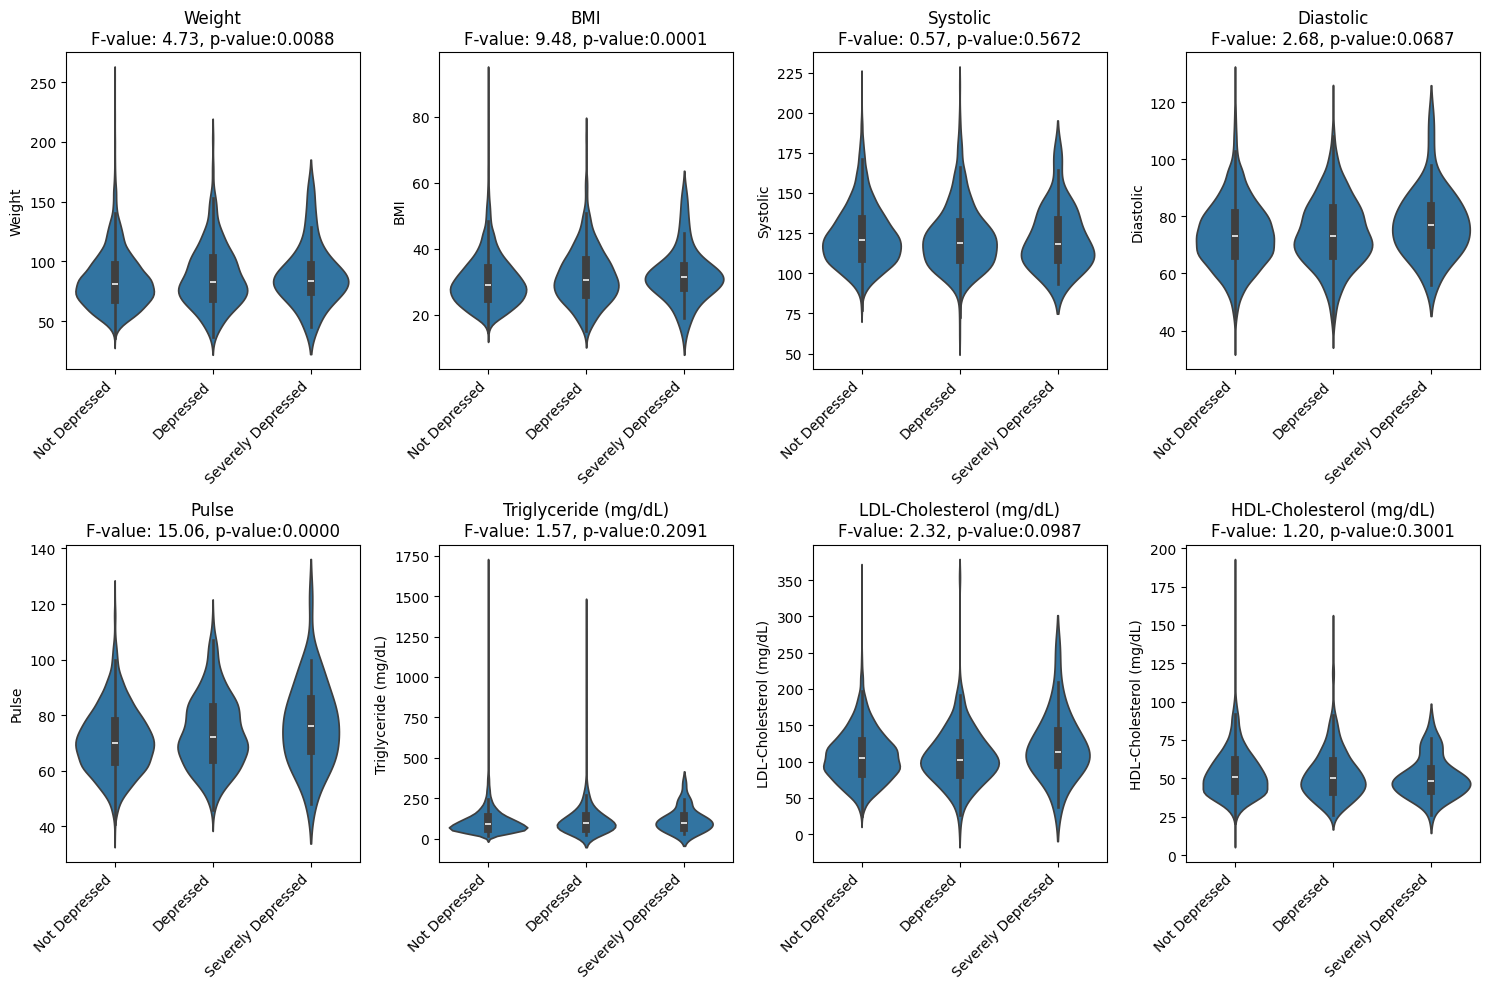

In [ ]:
feats = ['Weight', 'BMI', 'Systolic', 'Diastolic',
       'Pulse', 'Triglyceride (mg/dL)', 'LDL-Cholesterol (mg/dL)',
       'HDL-Cholesterol (mg/dL)']
anova_grid(health, feats, 'Depression_Label')

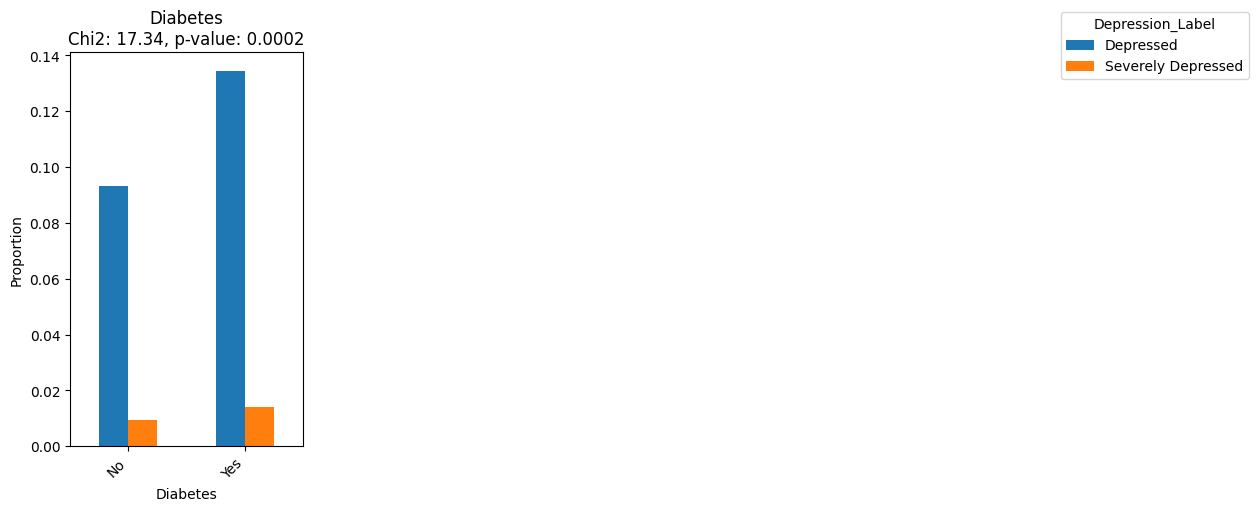

In [ ]:
categorical_feats = ['Diabetes']
labels_dict = {'Diabetes' : {1 : 'Yes', 0 : 'No'}}
chi_(health, categorical_feats, 'Depression_Label', labels_dict=labels_dict)

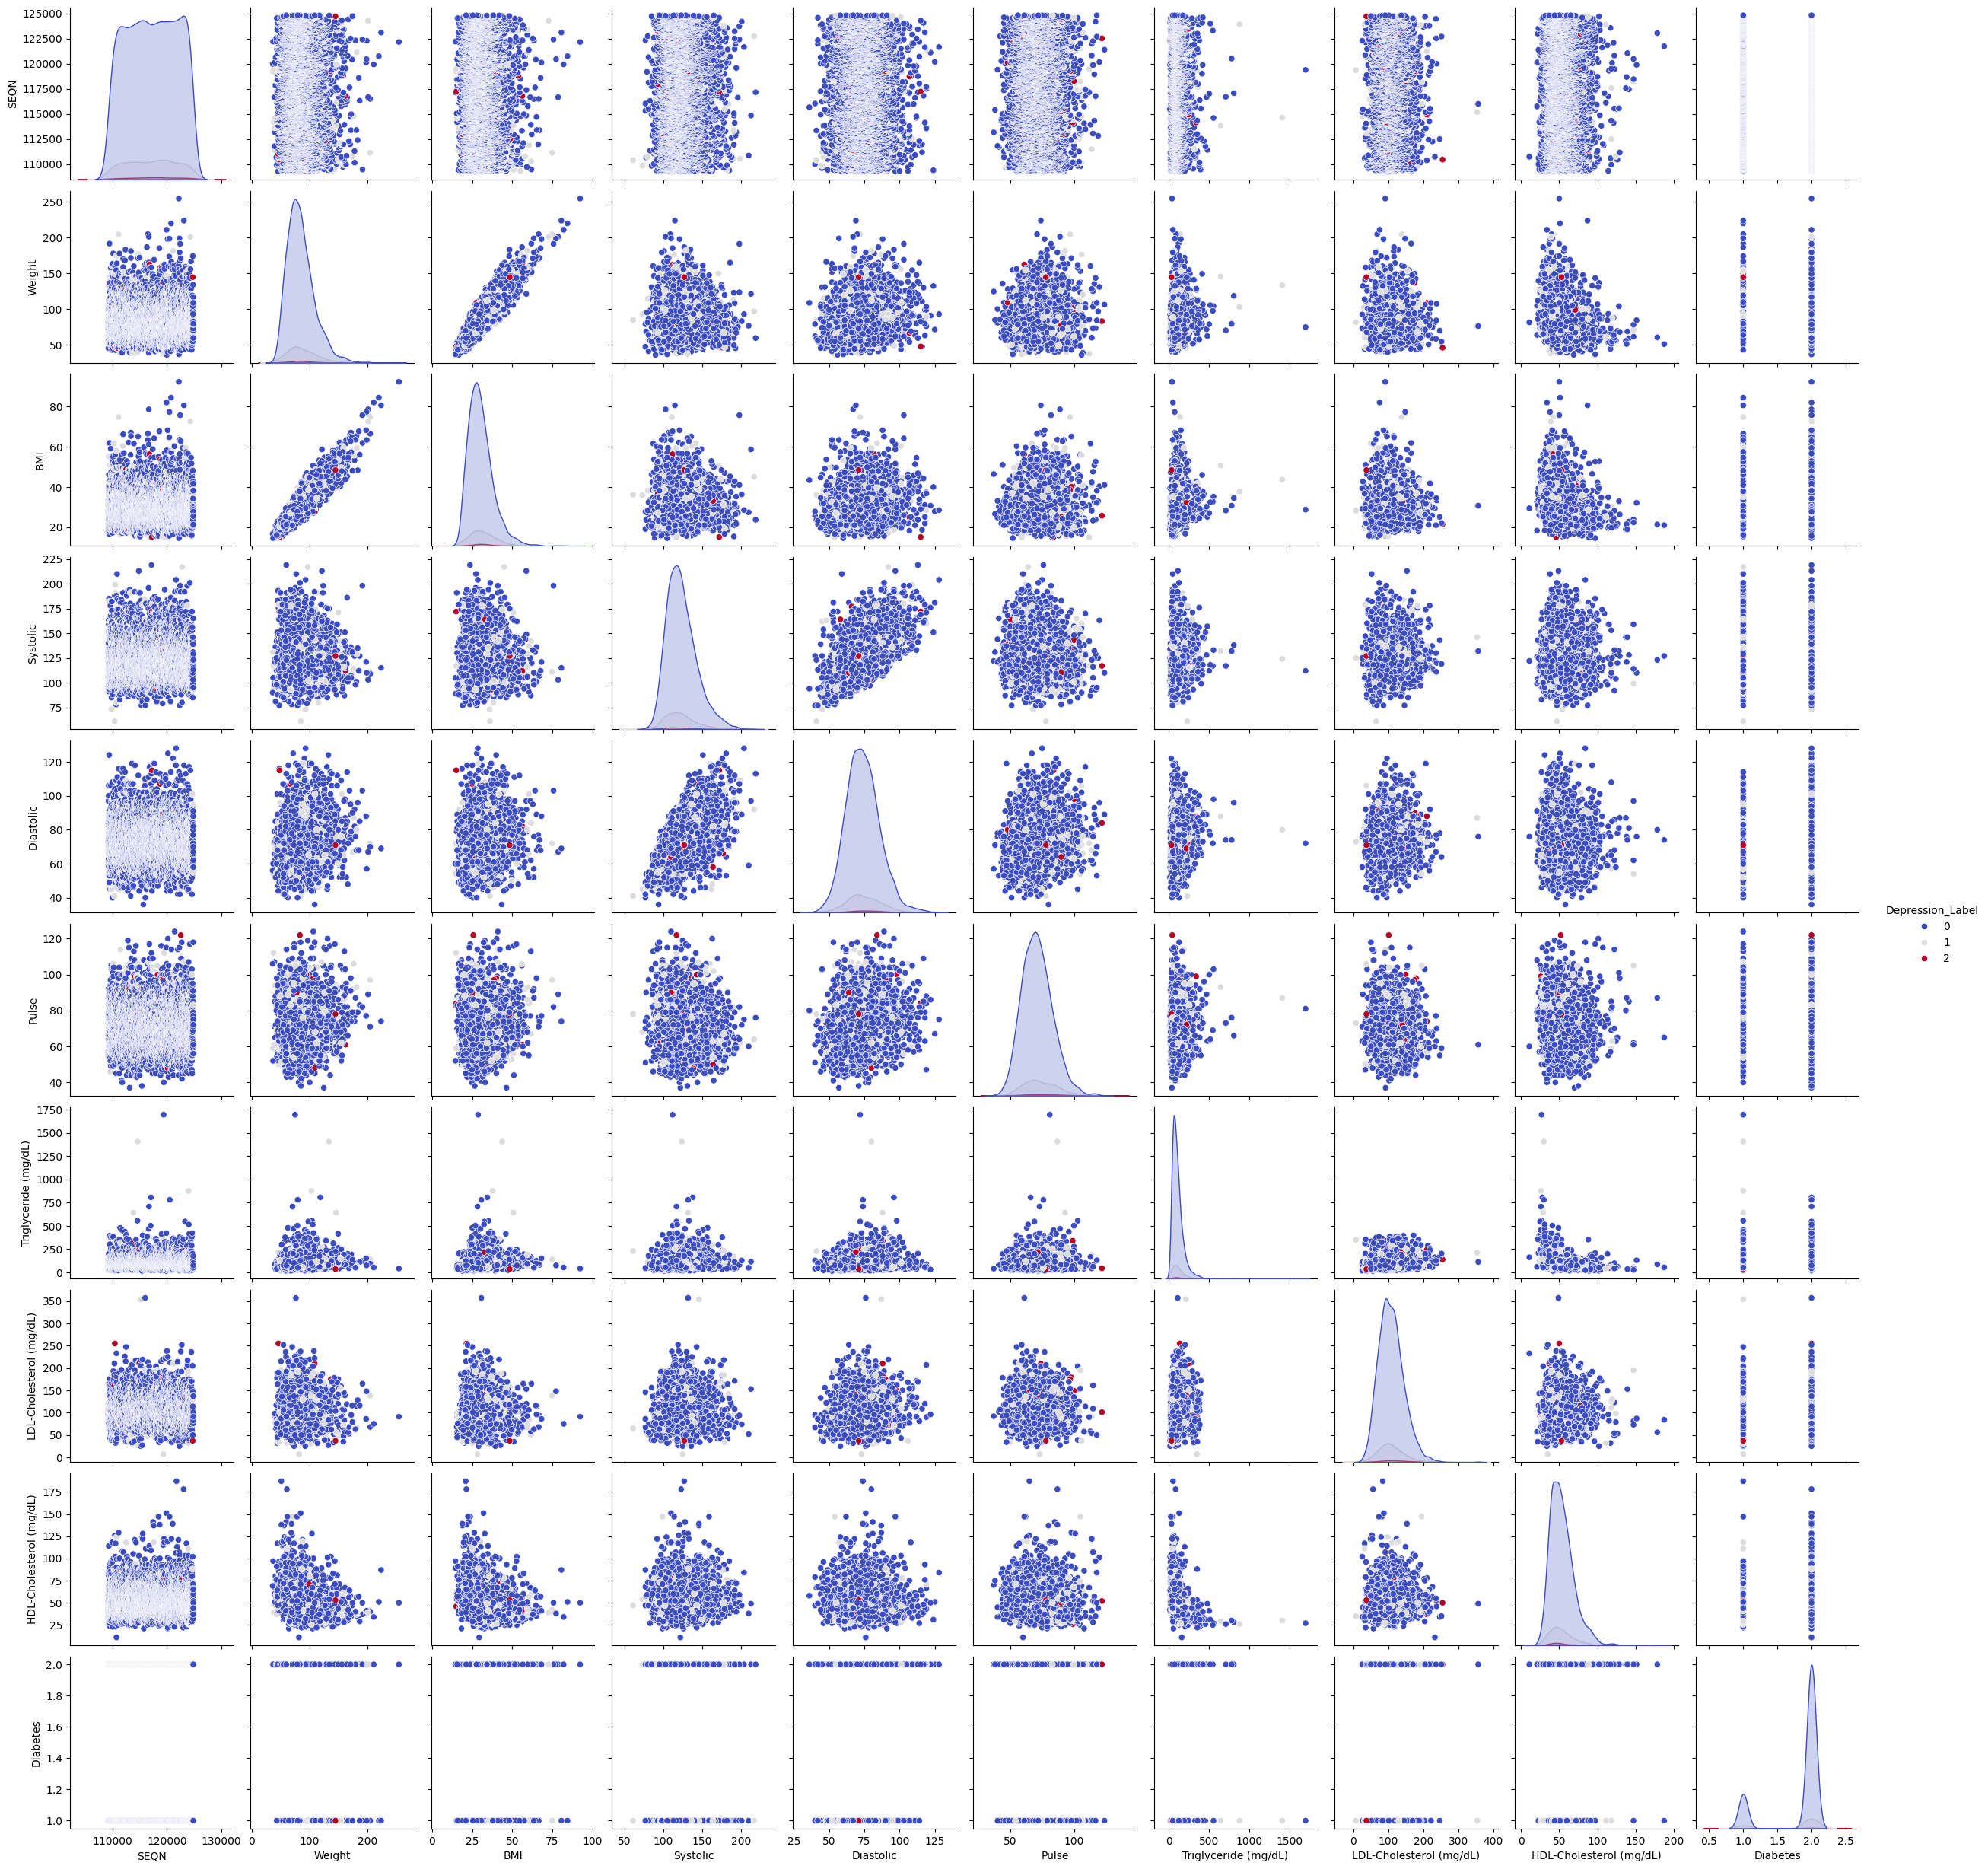

In [ ]:
df = health


# Pairplot with hue set to Depression_Label
sns.pairplot(df, hue="Depression_Label", diag_kind="kde", palette="coolwarm")
plt.show()

## Lifestyle; Alcohol, Smoking, Sleep

### Sleep

In [ ]:
slq = pd.read_sas("/content/drive/MyDrive/DSCI531/Project/NHANES/P_SLQ.xpt", format="xport")

slq = slq[['SEQN', 'SLQ050']]
slq = slq[(slq['SLQ050'] != 7) & (slq['SLQ050'] != 9)]
mp = {1:1, 2:0}
slq['SLQ050'] = slq['SLQ050'].apply(lambda x : mp[x] )

slq = slq.rename(columns = {'SLQ050':'SleepProblem'})

slq

SEQN  SleepProblem
0      109266.0             0
1      109267.0             0
2      109268.0             0
3      109271.0             1
4      109273.0             1
...         ...           ...
10190  124815.0             0
10191  124817.0             0
10192  124818.0             0
10193  124821.0             0
10194  124822.0             0

[10187 rows x 2 columns]

### Smoking

In [ ]:
smq = pd.read_sas("/content/drive/MyDrive/DSCI531/Project/NHANES/P_SMQ.xpt", format="xport")

smq = smq[['SEQN', 'SMQ020']]
smq = smq[(smq['SMQ020'] != 7) & (smq['SMQ020'] != 9)]
smq = smq.dropna()
mp = {1:1, 2:0}
smq['SMQ020'] = smq['SMQ020'].apply(lambda x : mp[x])

smq = smq.rename(columns = {'SMQ020':'Smokes'})

smq

SEQN  Smokes
1      109266.0       0
2      109267.0       0
3      109268.0       0
4      109271.0       1
5      109273.0       1
...         ...     ...
11132  124815.0       1
11133  124817.0       0
11134  124818.0       0
11135  124821.0       0
11136  124822.0       0

[9688 rows x 2 columns]

### Alc

In [ ]:
alq = pd.read_sas("/content/drive/MyDrive/DSCI531/Project/NHANES/P_ALQ.xpt", format="xport")

alq

SEQN  ALQ111        ALQ121  ALQ130        ALQ142        ALQ270  \
0     109266.0     1.0  1.000000e+01     1.0  5.397605e-79           NaN   
1     109271.0     1.0  5.397605e-79     NaN           NaN           NaN   
2     109273.0     1.0  5.397605e-79     NaN           NaN           NaN   
3     109274.0     1.0  4.000000e+00     2.0  5.000000e+00  7.000000e+00   
4     109282.0     1.0  5.397605e-79     NaN           NaN           NaN   
...        ...     ...           ...     ...           ...           ...   
8960  124815.0     1.0  3.000000e+00     1.0  5.397605e-79           NaN   
8961  124817.0     1.0  3.000000e+00     2.0  5.397605e-79           NaN   
8962  124818.0     1.0  9.000000e+00     2.0  5.397605e-79           NaN   
8963  124821.0     1.0  5.000000e+00     5.0  7.000000e+00  5.397605e-79   
8964  124822.0     1.0  6.000000e+00     2.0  5.397605e-79           NaN   

            ALQ280  ALQ290  ALQ151        ALQ170  
0              NaN     NaN     2.0  5.397605e-79  
1              NaN     NaN     1.0           NaN  
2              NaN     NaN     2.0           NaN  
3     5.397605e-79     NaN     2.0  5.397605e-79  
4              NaN     NaN     2.0           NaN  
...            ...     ...     ...           ...  
8960           NaN     NaN     2.0  5.397605e-79  
8961           NaN     NaN     2.0  5.397605e-79  
8962           NaN     NaN     2.0  5.397605e-79  
8963  5.397605e-79     NaN     2.0  5.397605e-79  
8964           NaN     NaN     1.0  9.990000e+02  

[8965 rows x 10 columns]

During the past 12 months, about how often did {you/SP} drink any type of alcoholic beverage? PROBE: How many days per week, per month, or per year did {you/SP} drink?

Code or Value	Value Description	Count	Cumulative	Skip to Item

0	Never in the last year	1638	1638	ALQ151

1	Every day	240	1878

2	Nearly every day	273	2151

3	3 to 4 times a week	514	2665

4	2 times a week	586	3251

5	Once a week	562	3813

6	2 to 3 times a month	1042	4855

7	Once a month	570	5425

8	7 to 11 times in the last year	457	5882

9	3 to 6 times in the last year	795	6677

10	1 to 2 times in the last year	822	7499

77	Refused	2	7501

99	Don't know	2	7503

.	Missing	1462	8965

In [ ]:
alq = alq[['SEQN', 'ALQ121']]

In [ ]:
alq = alq.dropna()
alq['ALQ121'] = alq['ALQ121'].replace(alq.at[1, 'ALQ121'], 0)
alq = alq[(alq.ALQ121 != 77) & (alq.ALQ121 != 99)]
alq.ALQ121.value_counts()

<ipython-input-94-5cedeae6b777>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alq['ALQ121'] = alq['ALQ121'].replace(alq.at[1, 'ALQ121'], 0)


ALQ121
0.0     1638
6.0     1042
10.0     822
9.0      795
4.0      586
7.0      570
5.0      562
3.0      514
8.0      457
2.0      273
1.0      240
Name: count, dtype: int64

In [ ]:
alq = alq.rename(columns={'ALQ121': 'AlcoholConsumption'})
alq

SEQN  AlcoholConsumption
0     109266.0                10.0
1     109271.0                 0.0
2     109273.0                 0.0
3     109274.0                 4.0
4     109282.0                 0.0
...        ...                 ...
8960  124815.0                 3.0
8961  124817.0                 3.0
8962  124818.0                 9.0
8963  124821.0                 5.0
8964  124822.0                 6.0

[7499 rows x 2 columns]

In [ ]:
alq.AlcoholConsumption.value_counts()

AlcoholConsumption
0.0     1638
6.0     1042
10.0     822
9.0      795
4.0      586
7.0      570
5.0      562
3.0      514
8.0      457
2.0      273
1.0      240
Name: count, dtype: int64

In [ ]:
mp = {0 : 0, 1: 1, 2: 1, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
alq['AlcoholConsumption'] = alq['AlcoholConsumption'].apply(lambda x : mp[x] )

In [ ]:
alq

SEQN  AlcoholConsumption
0     109266.0                   0
1     109271.0                   0
2     109273.0                   0
3     109274.0                   0
4     109282.0                   0
...        ...                 ...
8960  124815.0                   1
8961  124817.0                   1
8962  124818.0                   0
8963  124821.0                   0
8964  124822.0                   0

[7499 rows x 2 columns]

### All lifestyle

In [ ]:
from functools import reduce
import pandas as pd

# List of all DataFrames
dfs = [slq, smq, alq, dpq[['SEQN', 'Depression_Label']]]

# Merge all DataFrames on 'SEQN' and 'Depression_Label' using outer join
life = reduce(lambda left, right: pd.merge(left, right, on=['SEQN'], how='outer'), dfs)

life

SEQN  SleepProblem  Smokes  AlcoholConsumption  Depression_Label
0      109266.0           0.0     0.0                 0.0               NaN
1      109267.0           0.0     0.0                 NaN               NaN
2      109268.0           0.0     0.0                 NaN               NaN
3      109271.0           1.0     1.0                 0.0               0.0
4      109273.0           1.0     1.0                 0.0               1.0
...         ...           ...     ...                 ...               ...
10190  124815.0           0.0     1.0                 1.0               NaN
10191  124817.0           0.0     0.0                 1.0               0.0
10192  124818.0           0.0     0.0                 0.0               0.0
10193  124821.0           0.0     0.0                 0.0               0.0
10194  124822.0           0.0     0.0                 0.0               0.0

[10195 rows x 5 columns]

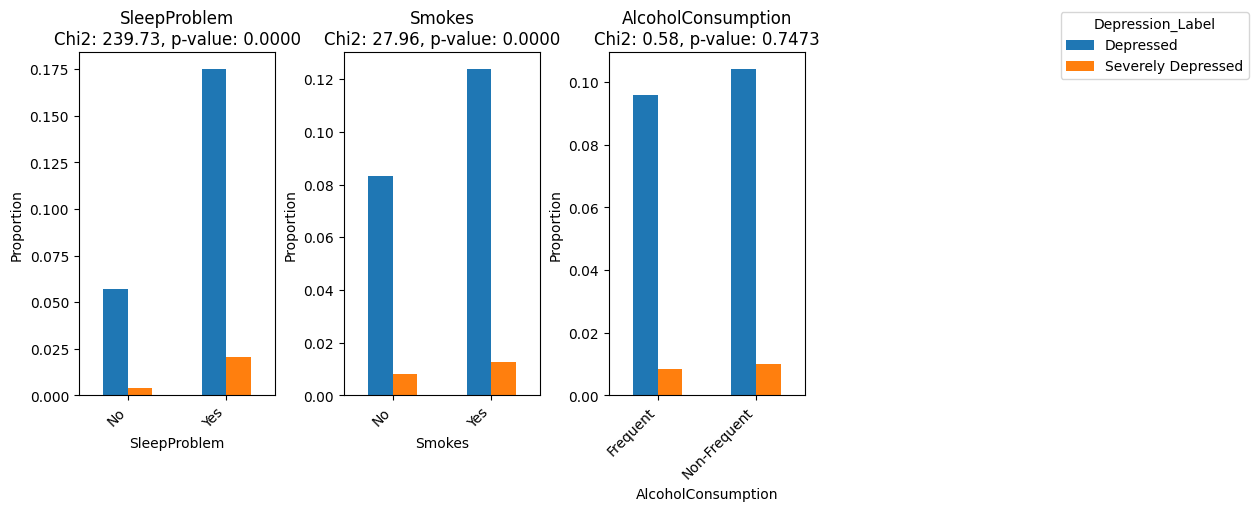

In [ ]:
categorical_feats = ['SleepProblem','Smokes','AlcoholConsumption']
labels_dict = {'SleepProblem' : {1 : 'Yes', 0 : 'No'}, 'Smokes' : {1 : 'Yes', 0 : 'No'}, 'AlcoholConsumption' : {1 : 'Frequent', 0 : 'Non-Frequent'}}
chi_(life, categorical_feats, 'Depression_Label', labels_dict=labels_dict)

## Combination of all features

In [ ]:
from functools import reduce
import pandas as pd

# List of all DataFrames
dfs = [demo, health, life]

# Merge all DataFrames on 'SEQN' and 'Depression_Label' using outer join
all_merged_df = reduce(lambda left, right: pd.merge(left, right, on=['SEQN', 'Depression_Label'], how='outer'), dfs)

all_merged_df

SEQN   Age  Gender  Race  MaritalStatus  IncomeRatio  HoursWorked  \
0     109271.0   NaN     NaN   NaN            NaN          NaN          NaN   
1     109273.0  36.0     0.0   3.0            3.0         0.83         28.0   
2     109282.0   NaN     NaN   NaN            NaN          NaN          NaN   
3     109290.0  68.0     1.0   4.0            2.0         5.00         60.0   
4     109291.0   NaN     NaN   NaN            NaN          NaN          NaN   
...        ...   ...     ...   ...            ...          ...          ...   
5512  124813.0   NaN     NaN   NaN            NaN          NaN          NaN   
5513  124817.0   NaN     NaN   NaN            NaN          NaN          NaN   
5514  124818.0  40.0     0.0   4.0            1.0         3.82         48.0   
5515  124821.0  63.0     0.0   4.0            2.0         3.71         46.0   
5516  124822.0   NaN     NaN   NaN            NaN          NaN          NaN   

      WorkSchedule  Depression_Label  Weight  ...  Systolic  Diastolic  Pulse  \
0              NaN               0.0    98.8  ...     111.0       68.0   70.0   
1              2.0               1.0    74.3  ...     115.0       68.0   70.0   
2              NaN               0.0    83.3  ...     140.0       70.0   55.0   
3              2.0               0.0    73.0  ...     122.0       59.0   57.0   
4              NaN               0.0    81.4  ...     107.0       73.0   76.0   
...            ...               ...     ...  ...       ...        ...    ...   
5512           NaN               0.0    78.6  ...     124.0       82.0   56.0   
5513           NaN               0.0    82.8  ...     113.0       66.0   72.0   
5514           1.0               0.0   108.8  ...      95.0       70.0  118.0   
5515           3.0               0.0    79.5  ...     129.0       67.0   61.0   
5516           NaN               0.0    59.7  ...     123.0       58.0   56.0   

      Triglyceride (mg/dL)  LDL-Cholesterol (mg/dL)  HDL-Cholesterol (mg/dL)  \
0                     84.0                     97.0                     33.0   
1                      NaN                      NaN                     42.0   
2                    132.0                    164.0                     43.0   
3                    102.0                    105.0                     40.0   
4                      NaN                      NaN                     51.0   
...                    ...                      ...                      ...   
5512                  45.0                     96.0                     52.0   
5513                   NaN                      NaN                     60.0   
5514                   NaN                      NaN                     50.0   
5515                  51.0                    101.0                     44.0   
5516                  75.0                     91.0                     65.0   

      Diabetes  SleepProblem  Smokes  AlcoholConsumption  
0          0.0           1.0     1.0                 0.0  
1          0.0           1.0     1.0                 0.0  
2          0.0           1.0     1.0                 0.0  
3          1.0           0.0     0.0                 0.0  
4          0.0           NaN     NaN                 NaN  
...        ...           ...     ...                 ...  
5512       0.0           0.0     0.0                 0.0  
5513       1.0           0.0     0.0                 1.0  
5514       0.0           0.0     0.0                 0.0  
5515       1.0           0.0     0.0                 0.0  
5516       0.0           0.0     0.0                 0.0  

[5517 rows x 21 columns]

In [ ]:
all_merged_df = all_merged_df.dropna()
all_merged_df

SEQN   Age  Gender  Race  MaritalStatus  IncomeRatio  HoursWorked  \
3     109290.0  68.0     1.0   4.0            2.0         5.00         60.0   
19    109340.0  44.0     0.0   7.0            1.0         1.13         10.0   
25    109365.0  49.0     1.0   2.0            1.0         1.15         32.0   
26    109377.0  41.0     0.0   3.0            2.0         2.57         45.0   
35    109403.0  30.0     0.0   7.0            1.0         5.00         45.0   
...        ...   ...     ...   ...            ...          ...          ...   
5488  124732.0  39.0     0.0   4.0            1.0         1.30         60.0   
5492  124741.0  58.0     0.0   7.0            1.0         1.64         35.0   
5496  124745.0  24.0     0.0   7.0            1.0         3.35         40.0   
5497  124752.0  35.0     1.0   7.0            3.0         0.66         30.0   
5515  124821.0  63.0     0.0   4.0            2.0         3.71         46.0   

      WorkSchedule  Depression_Label  Weight  ...  Systolic  Diastolic  Pulse  \
3              2.0               0.0    73.0  ...     122.0       59.0   57.0   
19             5.0               0.0   138.2  ...     160.0      106.0   78.0   
25             5.0               0.0    85.4  ...     120.0       91.0   64.0   
26             1.0               0.0    88.7  ...     123.0       80.0   63.0   
35             1.0               0.0   106.8  ...     119.0       72.0   63.0   
...            ...               ...     ...  ...       ...        ...    ...   
5488           1.0               0.0   102.9  ...     125.0       84.0   61.0   
5492           5.0               0.0   174.0  ...     131.0       90.0   79.0   
5496           5.0               1.0   112.3  ...     129.0       80.0   62.0   
5497           5.0               1.0    88.2  ...     136.0       95.0   76.0   
5515           3.0               0.0    79.5  ...     129.0       67.0   61.0   

      Triglyceride (mg/dL)  LDL-Cholesterol (mg/dL)  HDL-Cholesterol (mg/dL)  \
3                    102.0                    105.0                     40.0   
19                   201.0                    119.0                     48.0   
25                    62.0                    115.0                     64.0   
26                   133.0                    115.0                     28.0   
35                   120.0                    141.0                     35.0   
...                    ...                      ...                      ...   
5488                  98.0                    114.0                     60.0   
5492                 137.0                     79.0                     50.0   
5496                 117.0                    135.0                     49.0   
5497                  53.0                    130.0                     41.0   
5515                  51.0                    101.0                     44.0   

      Diabetes  SleepProblem  Smokes  AlcoholConsumption  
3          1.0           0.0     0.0                 0.0  
19         0.0           0.0     0.0                 0.0  
25         0.0           0.0     1.0                 1.0  
26         0.0           0.0     1.0                 0.0  
35         0.0           0.0     0.0                 0.0  
...        ...           ...     ...                 ...  
5488       0.0           0.0     1.0                 0.0  
5492       1.0           0.0     0.0                 0.0  
5496       0.0           0.0     1.0                 1.0  
5497       1.0           1.0     0.0                 0.0  
5515       1.0           0.0     0.0                 0.0  

[963 rows x 21 columns]

In [ ]:
all_merged_df.columns

Index(['SEQN', 'Age', 'Gender', 'Race', 'MaritalStatus', 'IncomeRatio',
       'HoursWorked', 'WorkSchedule', 'Depression_Label', 'Weight', 'BMI',
       'Systolic', 'Diastolic', 'Pulse', 'Triglyceride (mg/dL)',
       'LDL-Cholesterol (mg/dL)', 'HDL-Cholesterol (mg/dL)', 'Diabetes',
       'SleepProblem', 'Smokes', 'AlcoholConsumption'],
      dtype='object')

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Create a copy to avoid SettingWithCopyWarning
df_clean = life.copy()
df_clean = df_clean.dropna().copy()  # Ensure a full copy is made

df_clean = pd.get_dummies(df_clean, columns=['SleepProblem'], drop_first=True).astype(int)
df_clean = pd.get_dummies(df_clean, columns=['Smokes'], drop_first=True).astype(int)
df_clean = pd.get_dummies(df_clean, columns=['AlcoholConsumption'], drop_first=True).astype(int)

# Prepare feature set (drop SEQN and target variable)
X = df_clean.drop(columns=['SEQN', 'Depression_Label'])
X = sm.add_constant(X)  # Add intercept

# Encode target variable as categorical numeric
df_clean['Depression_Label'] = df_clean['Depression_Label'].astype('category')  # Ensure it's categorical
y = df_clean['Depression_Label'].cat.codes  # Convert categories to numerical values

# Fit Multinomial Logistic Regression
model = sm.MNLogit(y, X).fit()
print(model.summary())


In [ ]:
all_merged_df.columns

Index(['SEQN', 'Age', 'Gender', 'Race', 'MaritalStatus', 'IncomeRatio',
       'HoursWorked', 'WorkSchedule', 'Depression_Label', 'Weight', 'BMI',
       'Systolic', 'Diastolic', 'Pulse', 'Triglyceride (mg/dL)',
       'LDL-Cholesterol (mg/dL)', 'HDL-Cholesterol (mg/dL)', 'Diabetes',
       'SleepProblem', 'Smokes', 'AlcoholConsumption'],
      dtype='object')

In [ ]:
all_merged_df.Smokes.value_counts()

Smokes
0.0    549
1.0    414
Name: count, dtype: int64

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Create a copy to avoid SettingWithCopyWarning
df_clean = all_merged_df[['SEQN', 'Age', 'Gender', 'Race', 'MaritalStatus', 'IncomeRatio',
       'HoursWorked', 'WorkSchedule', 'Depression_Label', 'Weight', 'BMI',
       'Systolic', 'Diastolic', 'Pulse', 'Triglyceride (mg/dL)',
       'LDL-Cholesterol (mg/dL)', 'HDL-Cholesterol (mg/dL)', 'Diabetes',
       'SleepProblem', 'AlcoholConsumption']].copy()
df_clean = df_clean.dropna().copy()  # Ensure a full copy is made
# df_clean = pd.get_dummies(df_clean, columns=['Smokes'], drop_first=True).astype(int)


# Prepare feature set (drop SEQN and target variable)
X = df_clean.drop(columns=['SEQN', 'Depression_Label'])
X = sm.add_constant(X)  # Add intercept

# Encode target variable as categorical numeric
df_clean['Depression_Label'] = df_clean['Depression_Label'].astype('category')  # Ensure it's categorical
y = df_clean['Depression_Label'].cat.codes  # Convert categories to numerical values

# Fit Multinomial Logistic Regression
model = sm.MNLogit(y, X).fit()
print(model.summary())


         Current function value: 0.227264
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  963
Model:                        MNLogit   Df Residuals:                      925
Method:                           MLE   Df Model:                           36
Date:                Fri, 04 Apr 2025   Pseudo R-squ.:                  0.1614
Time:                        06:33:30   Log-Likelihood:                -218.86
converged:                      False   LL-Null:                       -260.98
Covariance Type:            nonrobust   LLR p-value:                 9.691e-06
                    y=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -5.9329      1.664     -3.565      0.000      -9.194      -2.671
Age                       

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


X = df_clean.drop(columns = ['SEQN','Depression_Label']).copy()
y = df_clean['Depression_Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       181
         1.0       0.00      0.00      0.00        10
         2.0       0.00      0.00      0.00         2

    accuracy                           0.94       193
   macro avg       0.31      0.33      0.32       193
weighted avg       0.88      0.94      0.91       193

Random Forest Performance:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       181
         1.0       0.00      0.00      0.00        10
         2.0       0.00      0.00      0.00         2

    accuracy                           0.94       193
   macro avg       0.31      0.33      0.32       193
weighted avg       0.88      0.94      0.91       193



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


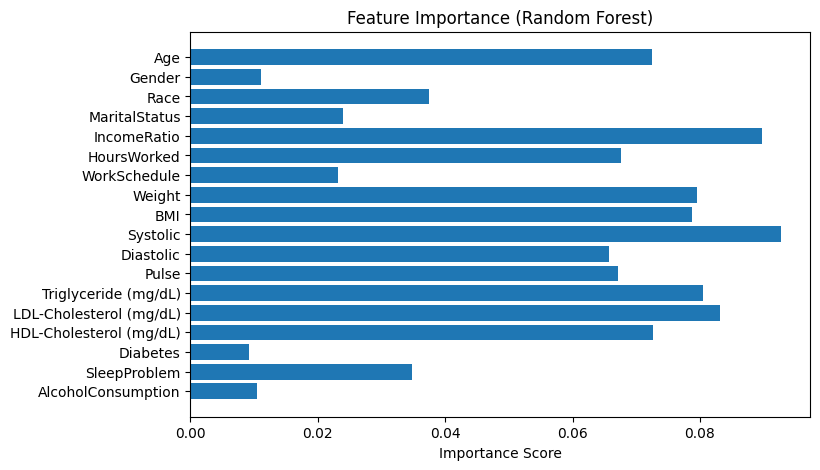

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8,5))
plt.barh(feature_names, importances)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

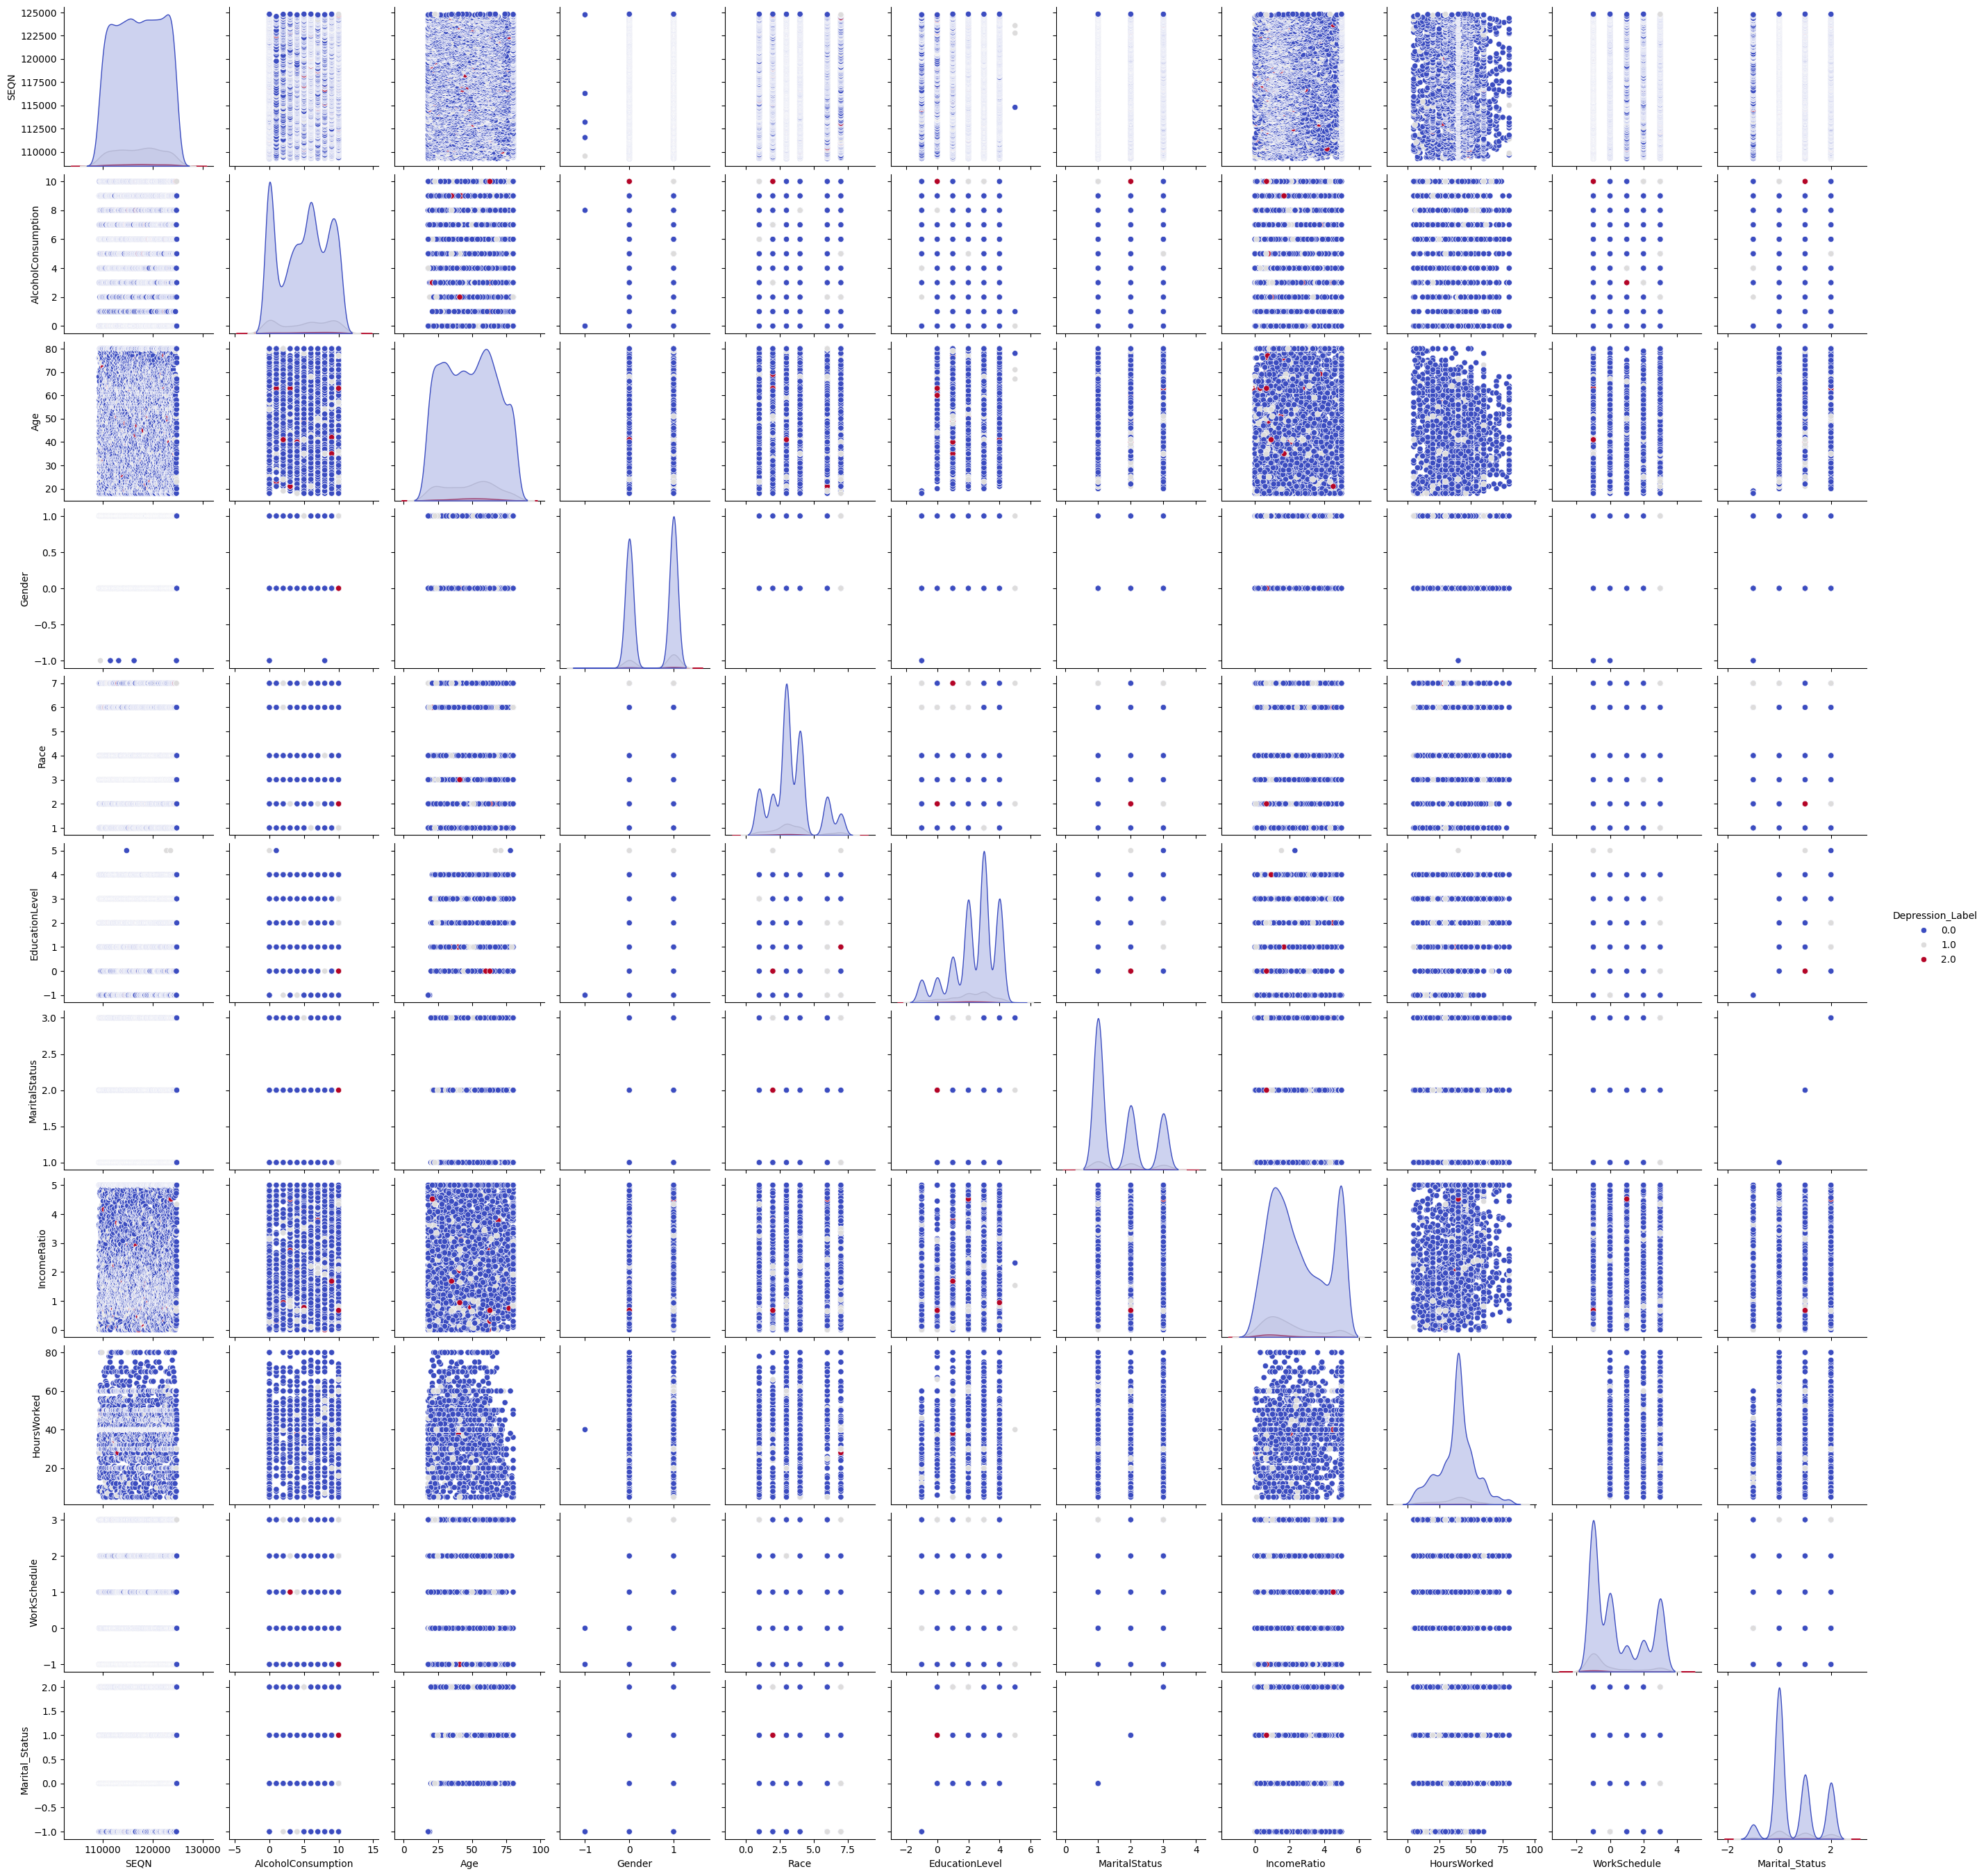

In [ ]:
df = demo
df["Marital_Status"] = df["MaritalStatus"].astype("category").cat.codes
df["Gender"] = df["Gender"].astype("category").cat.codes
df["EducationLevel"] = df["EducationLevel"].astype("category").cat.codes
df["WorkSchedule"] = df["WorkSchedule"].astype("category").cat.codes


# Pairplot with hue set to Depression_Label
sns.pairplot(df, hue="Depression_Label", diag_kind="kde", palette="coolwarm")
plt.show()

In [ ]:
demo

SEQN  AlcoholConsumption   Age  Gender  Race  EducationLevel  \
0      109263.0                 NaN   2.0       0   6.0              -1   
1      109264.0                 NaN  13.0       1   1.0              -1   
2      109265.0                 NaN   2.0       0   3.0              -1   
3      109266.0                10.0  29.0       1   6.0               4   
4      109267.0                 NaN  21.0       1   2.0               3   
...         ...                 ...   ...     ...   ...             ...   
15555  124818.0                 9.0  40.0       0   4.0               4   
15556  124819.0                 NaN   2.0       0   4.0              -1   
15557  124820.0                 NaN   7.0       1   3.0              -1   
15558  124821.0                 5.0  63.0       0   4.0               1   
15559  124822.0                 6.0  74.0       0   2.0               2   

       MaritalStatus  IncomeRatio  HoursWorked  WorkSchedule  \
0                NaN         4.66          NaN            -1   
1                NaN         0.83          NaN            -1   
2                NaN         3.06          NaN            -1   
3                3.0         5.00         40.0             0   
4                3.0         5.00         40.0             0   
...              ...          ...          ...           ...   
15555            1.0         3.82         48.0             0   
15556            NaN         0.07          NaN            -1   
15557            NaN         1.22          NaN            -1   
15558            2.0         3.71         46.0             2   
15559            1.0          NaN         45.0             0   

       Depression_Label  Marital_Status  
0                   NaN              -1  
1                   NaN              -1  
2                   NaN              -1  
3                   NaN               2  
4                   NaN               2  
...                 ...             ...  
15555               0.0               0  
15556               NaN              -1  
15557               NaN              -1  
15558               0.0               1  
15559               0.0               0  

[15560 rows x 12 columns]

In [ ]:
demo

SEQN  AlcoholConsumption   Age  Gender  Race  EducationLevel  \
0      109263.0                 NaN   2.0     1.0   6.0             NaN   
1      109264.0                 NaN  13.0     2.0   1.0             NaN   
2      109265.0                 NaN   2.0     1.0   3.0             NaN   
3      109266.0                10.0  29.0     2.0   6.0             5.0   
4      109267.0                 NaN  21.0     2.0   2.0             4.0   
...         ...                 ...   ...     ...   ...             ...   
15555  124818.0                 9.0  40.0     1.0   4.0             5.0   
15556  124819.0                 NaN   2.0     1.0   4.0             NaN   
15557  124820.0                 NaN   7.0     2.0   3.0             NaN   
15558  124821.0                 5.0  63.0     1.0   4.0             2.0   
15559  124822.0                 6.0  74.0     1.0   2.0             3.0   

       MaritalStatus  IncomeRatio  HoursWorked  WorkSchedule  Depression_Label  
0                NaN         4.66          NaN           NaN               NaN  
1                NaN         0.83          NaN           NaN               NaN  
2                NaN         3.06          NaN           NaN               NaN  
3                3.0         5.00         40.0           1.0               NaN  
4                3.0         5.00         40.0           1.0               NaN  
...              ...          ...          ...           ...               ...  
15555            1.0         3.82         48.0           1.0               0.0  
15556            NaN         0.07          NaN           NaN               NaN  
15557            NaN         1.22          NaN           NaN               NaN  
15558            2.0         3.71         46.0           3.0               0.0  
15559            1.0          NaN         45.0           1.0               0.0  

[15560 rows x 11 columns]

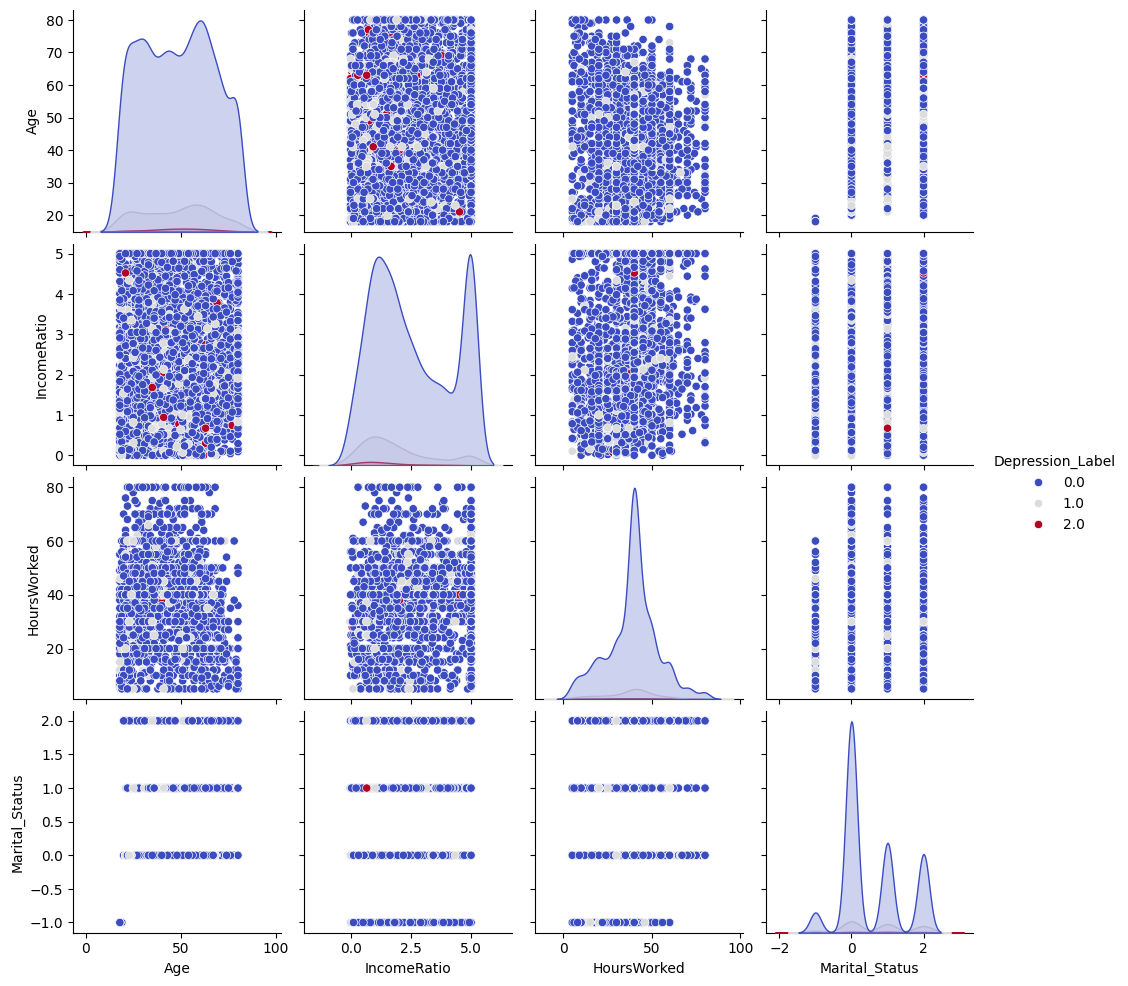

In [ ]:
df = demo.drop(columns = {'SEQN', 'Marital_Status', 'Gender', 'EducationLevel', 'WorkSchedule', 'Race', 'AlcoholConsumption'})
# df["Marital_Status"] = df["MaritalStatus"].astype("category").cat.codes
# df["Gender"] = df["Gender"].astype("category").cat.codes
# df["EducationLevel"] = df["EducationLevel"].astype("category").cat.codes
# df["WorkSchedule"] = df["WorkSchedule"].astype("category").cat.codes


# Pairplot with hue set to Depression_Label
sns.pairplot(df, hue="Depression_Label", diag_kind="kde", palette="coolwarm")
plt.show()

In [ ]:
all_merged_df.columns

Index(['SEQN', 'Age', 'Gender', 'Race', 'MaritalStatus', 'IncomeRatio',
       'HoursWorked', 'WorkSchedule', 'Depression_Label', 'Weight', 'BMI',
       'Systolic', 'Diastolic', 'Pulse', 'Triglyceride (mg/dL)',
       'LDL-Cholesterol (mg/dL)', 'HDL-Cholesterol (mg/dL)', 'Diabetes',
       'SleepProblem', 'Smokes', 'AlcoholConsumption'],
      dtype='object')

In [ ]:
cat_cols = ['Gender', 'Race', 'MaritalStatus', 'WorkSchedule',
            'Diabetes','SleepProblem', 'Smokes', 'AlcoholConsumption',
            'Depression_Label']

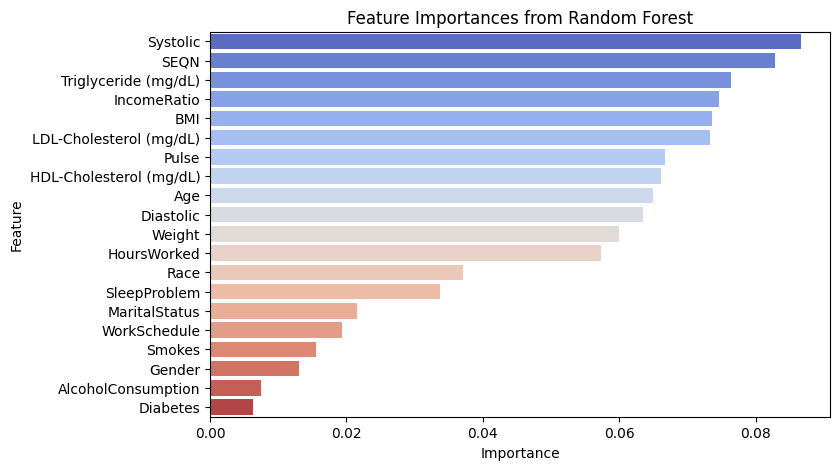

<Figure size 640x480 with 0 Axes>

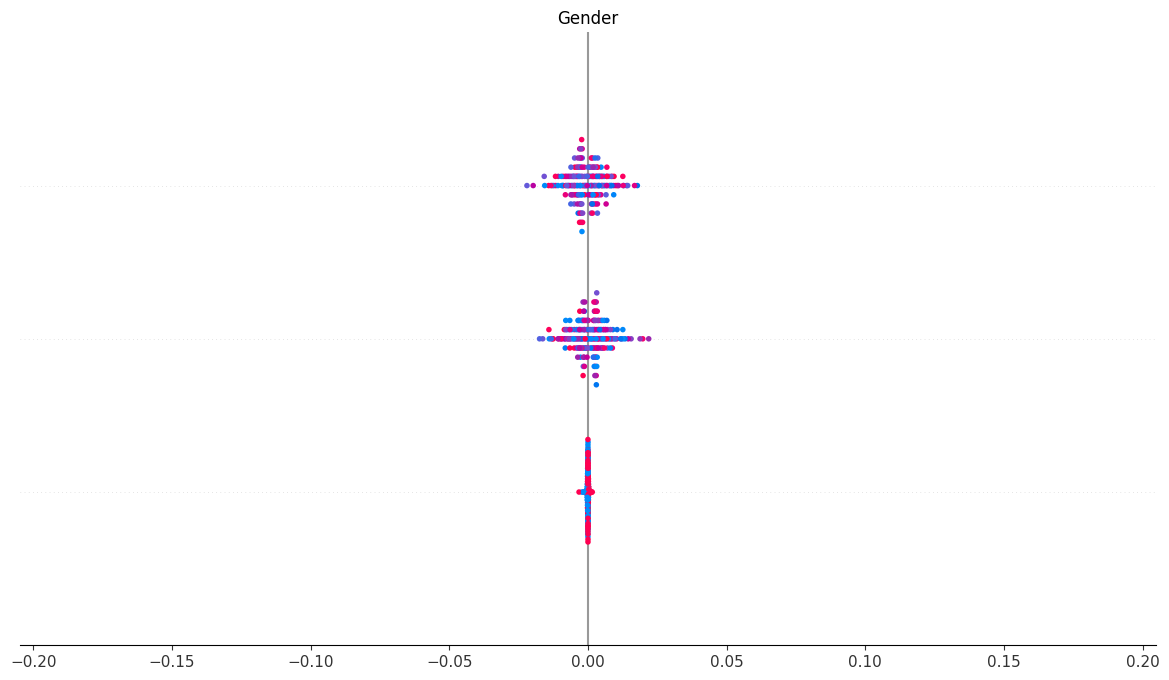

<Figure size 640x480 with 0 Axes>

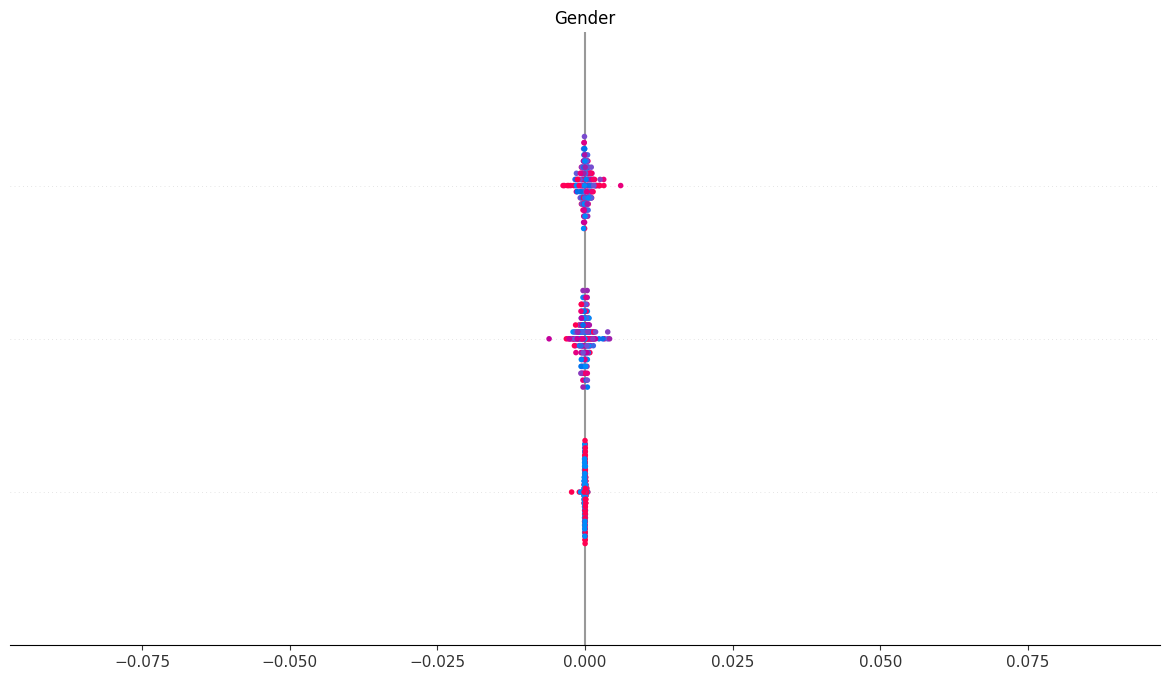

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay, permutation_importance
import shap

df = all_merged_df

# ---------------------------
# 2️⃣ Encode Categorical Features
# ---------------------------
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for later interpretation

# ---------------------------
# 3️⃣ Split Dataset into Training and Testing
# ---------------------------
X = df.drop("Depression_Label", axis=1)
y = df["Depression_Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# 4️⃣ Train a Random Forest Model
# ---------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# ---------------------------
# 5️⃣ Feature Importance Analysis
# ---------------------------
feature_importances = rf.feature_importances_
feat_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feat_importance_df = feat_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
# sns.barplot(data=feat_importance_df, x='Importance', y='Feature', palette="coolwarm")
sns.barplot(data=feat_importance_df, x='Importance', y='Feature', palette="coolwarm", hue="Feature", legend=False)
plt.title("Feature Importances from Random Forest")
plt.show()

# ---------------------------
# 6️⃣ SHAP Analysis for Interaction Detection
# ---------------------------
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Summary plot to visualize feature effects
shap.summary_plot(shap_values, X_test)

# Interaction values
shap_interactions = explainer.shap_interaction_values(X_test)
shap.summary_plot(shap_interactions[:, :, 0], X_test)

